In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, recall_score, f1_score, roc_auc_score, classification_report, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Thiazole project/Data for Training Model/data_with_descriptors.csv')
data

,Unnamed: 0,Smiles,pChEMBL Value,Activity,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,Brc1ccc(OC[C@@H]2C[C@H]3C[C@H]3N2)cn1.Cl,7.330000,1,8.323890,8.323890,0.195394,-3.530358,0.870858,64.875000,...,0,0,0,0,0,0,0,0,0,0
1,1,Brc1cncc(OC[C@@H]2C[C@@H]3C[C@@H]3N2)c1.Cl,8.540000,1,8.331268,8.331268,0.251300,-3.513776,0.930940,64.875000,...,0,0,0,0,0,0,0,0,0,0
2,2,Brc1cncc(OC[C@@H]2C[C@H]3C[C@H]3N2)c1.O=C(O)C(...,8.190000,1,10.896164,10.896164,0.251300,-3.513776,0.424399,53.080000,...,0,0,0,0,0,0,0,0,0,0
3,3,C(#Cc1cncc(OC[C@@H]2CCN2)c1)c1ccccc1,10.310000,1,8.245222,8.245222,0.279131,-3.515609,0.863182,38.600000,...,0,0,0,0,0,0,0,0,0,0
4,4,C(#Cc1cncc(OC[C@H]2CCN2)c1)c1ccccc1,9.960000,1,8.245222,8.245222,0.279131,-3.515609,0.863182,38.600000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,c1cncc(OCCN2CCCC2)c1,6.670000,0,8.029445,8.029445,0.589156,-3.904855,0.723506,50.285714,...,0,0,0,0,0,0,0,0,0,0
652,652,c1cncc(OC[C@@H]2CCN2)c1,10.346667,1,7.911737,7.911737,0.234990,-3.367943,0.717877,53.333333,...,0,0,0,0,0,0,0,0,0,0
653,653,c1cncc([C@@H]2CCCN2)c1,7.540000,1,8.249213,8.249213,0.281595,-3.338776,0.652566,61.818182,...,0,0,0,0,0,0,0,0,0,0
654,654,c1nc2cc3c(cc2[nH]1)C1CNCC3C1,9.820000,1,8.681182,8.681182,0.288718,-3.330962,0.678148,62.000000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
classify_data = data.drop(columns=['Unnamed: 0', 'Smiles', 'pChEMBL Value'])  # Remove unnecessary column
classify_data

,Activity,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,8.323890,8.323890,0.195394,-3.530358,0.870858,64.875000,305.603,291.491,303.997803,...,0,0,0,0,0,0,0,0,0,0
1,1,8.331268,8.331268,0.251300,-3.513776,0.930940,64.875000,305.603,291.491,303.997803,...,0,0,0,0,0,0,0,0,0,0
2,1,10.896164,10.896164,0.251300,-3.513776,0.424399,53.080000,419.228,400.076,418.037563,...,0,0,0,0,0,0,0,0,0,0
3,1,8.245222,8.245222,0.279131,-3.515609,0.863182,38.600000,264.328,248.200,264.126263,...,0,0,0,0,0,0,0,0,0,0
4,1,8.245222,8.245222,0.279131,-3.515609,0.863182,38.600000,264.328,248.200,264.126263,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0,8.029445,8.029445,0.589156,-3.904855,0.723506,50.285714,192.262,176.134,192.126263,...,0,0,0,0,0,0,0,0,0,0
652,1,7.911737,7.911737,0.234990,-3.367943,0.717877,53.333333,164.208,152.112,164.094963,...,0,0,0,0,0,0,0,0,0,0
653,1,8.249213,8.249213,0.281595,-3.338776,0.652566,61.818182,148.209,136.113,148.100048,...,0,0,0,0,0,0,0,0,0,0
654,1,8.681182,8.681182,0.288718,-3.330962,0.678148,62.000000,199.257,186.153,199.110947,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Split into train and test set

X = classify_data.drop(columns=['Activity'])  # All descriptors
y = classify_data['Activity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
X_train

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
482,13.777813,13.777813,0.762794,-4.541237,0.914311,57.480000,356.857,335.689,356.140389,130,...,0,0,0,0,0,0,0,0,0,0
39,8.875221,8.875221,0.706852,-4.189752,0.844489,64.400000,272.392,248.200,272.188863,108,...,0,0,0,0,0,0,0,0,0,0
608,8.844838,8.844838,0.488918,-3.691004,0.716667,69.875000,217.268,202.148,217.110279,84,...,0,0,0,0,0,0,0,0,0,0
652,7.911737,7.911737,0.234990,-3.367943,0.717877,53.333333,164.208,152.112,164.094963,64,...,0,0,0,0,0,0,0,0,0,0
330,9.010489,9.010489,0.654131,-4.118254,0.905577,57.521739,332.831,311.663,332.129156,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,14.356186,14.356186,0.099718,-4.010438,0.841266,61.050000,272.327,255.191,272.143725,104,...,0,0,0,0,0,0,0,0,0,0
106,7.765633,7.765633,0.578711,-3.617591,0.629711,29.307692,174.247,160.135,174.115698,68,...,0,0,0,0,0,0,0,0,0,0
144,8.725510,8.725510,0.626820,-4.059830,0.802951,63.882353,235.283,218.147,235.120843,92,...,0,0,0,0,0,0,0,0,0,0
590,8.731135,8.731135,0.653878,-4.109257,0.868858,71.764706,233.311,214.159,233.141579,92,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_train

,Activity
482,0
39,1
608,1
652,1
330,0
...,...
401,0
106,0
144,1
590,1


In [11]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Activity
482,13.777813,13.777813,0.762794,-4.541237,0.914311,57.480000,356.857,335.689,356.140389,130,...,0,0,0,0,0,0,0,0,0,0
39,8.875221,8.875221,0.706852,-4.189752,0.844489,64.400000,272.392,248.200,272.188863,108,...,0,0,0,0,0,0,0,0,0,1
608,8.844838,8.844838,0.488918,-3.691004,0.716667,69.875000,217.268,202.148,217.110279,84,...,0,0,0,0,0,0,0,0,0,1
652,7.911737,7.911737,0.234990,-3.367943,0.717877,53.333333,164.208,152.112,164.094963,64,...,0,0,0,0,0,0,0,0,0,1
330,9.010489,9.010489,0.654131,-4.118254,0.905577,57.521739,332.831,311.663,332.129156,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,14.356186,14.356186,0.099718,-4.010438,0.841266,61.050000,272.327,255.191,272.143725,104,...,0,0,0,0,0,0,0,0,0,0
106,7.765633,7.765633,0.578711,-3.617591,0.629711,29.307692,174.247,160.135,174.115698,68,...,0,0,0,0,0,0,0,0,0,0
144,8.725510,8.725510,0.626820,-4.059830,0.802951,63.882353,235.283,218.147,235.120843,92,...,0,0,0,0,0,0,0,0,0,1
590,8.731135,8.731135,0.653878,-4.109257,0.868858,71.764706,233.311,214.159,233.141579,92,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Activity
51,12.968284,12.968284,0.631601,-4.621118,0.804968,36.277778,250.342,228.166,250.168128,100,...,0,0,0,0,0,0,0,0,0,0
614,8.995661,8.995661,0.389150,-3.541361,0.797036,56.111111,235.330,218.194,235.136100,90,...,0,0,0,0,0,0,0,0,0,0
385,13.830744,13.830744,0.180977,-4.229449,0.850159,58.304348,316.380,295.212,316.169940,122,...,0,0,0,0,0,0,0,0,0,0
637,9.529557,9.529557,0.662126,-4.428489,0.722372,57.076923,345.446,322.262,345.184112,132,...,0,0,0,0,0,0,0,0,0,0
132,8.757541,8.757541,0.322799,-3.596269,0.704098,52.933333,201.269,186.149,201.115364,78,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,7.840906,7.840906,0.646724,-3.570832,0.681567,33.083333,162.236,148.124,162.115698,64,...,0,0,0,0,0,0,0,0,0,1
231,8.446112,8.446112,0.443323,-3.738776,0.878003,68.437500,240.734,223.598,240.102941,88,...,0,0,0,0,0,0,0,0,0,1
177,12.103014,12.103014,0.525703,-3.756713,0.551886,82.500000,170.212,156.100,170.105528,68,...,0,0,0,0,0,0,0,0,0,1
142,12.996104,12.996104,0.579058,-4.163673,0.803610,45.000000,270.332,252.188,270.136828,104,...,0,0,0,0,0,0,0,0,0,0


In [13]:
model    = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='logloss')
model.fit(X_train, y_train)
sorted_idx = model.feature_importances_.argsort()
#plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
#plt.xlabel("Xgboost Feature Importance")

In [14]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': sorted_idx
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
90       EState_VSA5         209
25      BCUT2D_MRLOW         208
64          SMR_VSA3         207
63          SMR_VSA2         206
62         SMR_VSA10         205
..               ...         ...
151  fr_allylic_oxid           4
173         fr_imide           3
146     fr_Nhpyrrole           2
92       EState_VSA7           1
168       fr_guanido           0

[210 rows x 2 columns]


In [15]:
feature_importance_df.describe()

,Importance
count,210.000000
mean,104.500000
std,60.765944
min,0.000000
25%,52.250000
50%,104.500000
75%,156.750000
max,209.000000


In [16]:
# Chọn đặc trưng
selector = SelectFromModel(model, prefit=True)

# Lấy đặc trưng đã chọn
X_train_selected = selector.transform(X_train)
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['SPS', 'MinPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'BalabanJ', 'Chi0', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA2', 'PEOE_VSA5', 'PEOE_VSA6', 'SMR_VSA3',
       'SlogP_VSA2', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'VSA_EState2',
       'FractionCSP3', 'NumHeteroatoms', 'NumSaturatedHeterocycles',
       'RingCount', 'fr_NH0', 'fr_Ndealkylation1', 'fr_Ndealkylation2',
       'fr_allylic_oxid', 'fr_bicyclic', 'fr_para_hydroxylation'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


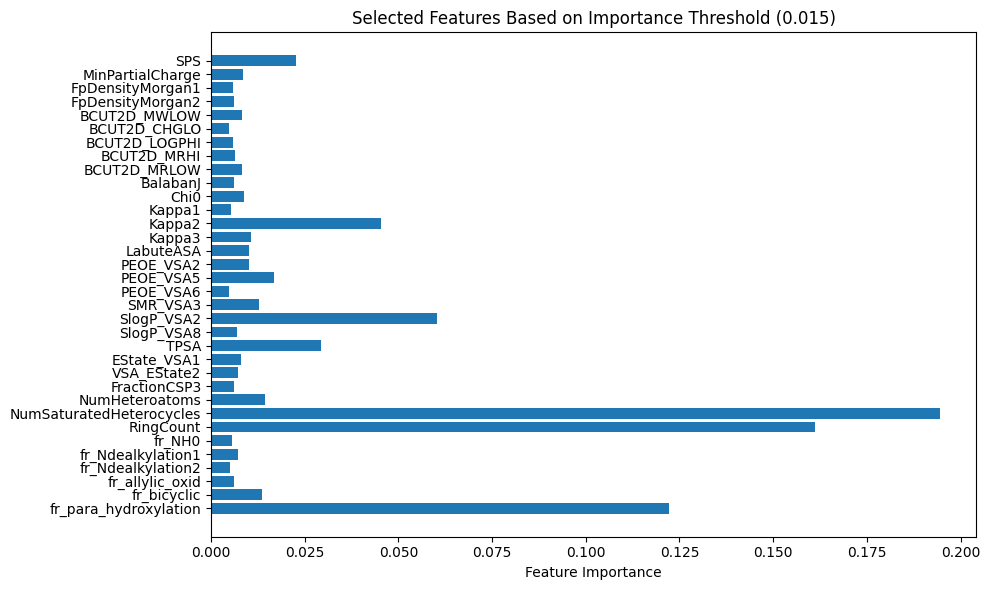

In [17]:
# Plot feature importances for the selected features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices by importance in descending order
selected_importances = importances[selector.get_support()]  # Importances of selected features

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), selected_importances[::-1], align='center')
plt.yticks(range(len(selected_features)), selected_features[::-1])
plt.xlabel("Feature Importance")
plt.title("Selected Features Based on Importance Threshold (0.015)")
plt.tight_layout()
plt.show()

In [18]:
# Apply the selected features to the test set
X_test_selected = X_test[selected_features]
X_test_selected

,SPS,MinPartialCharge,FpDensityMorgan1,FpDensityMorgan2,BCUT2D_MWLOW,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,...,FractionCSP3,NumHeteroatoms,NumSaturatedHeterocycles,RingCount,fr_NH0,fr_Ndealkylation1,fr_Ndealkylation2,fr_allylic_oxid,fr_bicyclic,fr_para_hydroxylation
51,36.277778,-0.449107,1.500000,2.277778,10.219545,-2.207311,2.117973,5.862975,0.141535,3.937512,...,0.500000,4,0,1,2,0,0,0,0,1
614,56.111111,-0.315515,1.111111,1.944444,9.914503,-2.200955,2.469184,5.708911,0.453774,2.388214,...,0.294118,1,1,4,0,0,0,0,5,0
385,58.304348,-0.490850,1.478261,2.347826,9.839811,-2.439168,2.352414,5.594189,0.050367,2.056693,...,0.529412,6,3,5,4,0,0,0,3,0
637,57.076923,-0.472353,1.192308,2.076923,9.783057,-2.500226,2.359839,5.782794,-0.059427,1.988412,...,0.363636,4,3,6,3,0,0,0,4,1
132,52.933333,-0.463989,1.666667,2.600000,10.040319,-2.174750,2.350744,5.809307,0.316828,2.585501,...,0.384615,2,1,3,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,33.083333,-0.319444,2.083333,3.083333,10.225314,-1.916844,1.982562,5.465360,0.809028,3.625987,...,0.300000,2,0,1,1,0,0,0,0,0
231,68.437500,-0.490353,2.125000,3.062500,10.174044,-2.161763,2.506550,5.853020,0.261318,0.000002,...,0.583333,4,1,3,1,0,0,0,1,0
177,82.500000,-0.452735,1.833333,2.500000,10.012000,-2.143641,2.257460,5.673850,0.129888,2.807997,...,0.875000,4,2,2,1,0,1,0,1,0
142,45.000000,-0.460388,1.750000,2.650000,10.147248,-2.183877,2.165276,5.931078,0.041570,2.243329,...,0.375000,4,1,3,2,1,1,0,1,1


In [19]:
model    = XGBClassifier(random_state = 42, verbosity=0, use_label_encoder=False, eval_metrics ='logloss')
model.fit(X_train_selected, y_train)
print(classification_report(y_test, model.predict(X_test_selected)))
print('AUC Testset Baseline =', roc_auc_score(y_test, model.predict(X_test_selected)))
print('AP Testset Baseline =', average_precision_score(y_test, model.predict(X_test_selected)))
print('F1 Testset Baseline =', f1_score(y_test, model.predict(X_test_selected)))
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores_f1_baseline = cross_val_score(model, X_train_selected, y_train, scoring = "f1", cv=cv, n_jobs = 1)
scores_ap_baseline=cross_val_score(model, X_train_selected, y_train, scoring = "average_precision",
                         cv= cv, n_jobs = 1)
scores_accuracy_baseline=cross_val_score(model, X_train_selected, y_train, scoring = "accuracy",
                         cv= cv, n_jobs = 1)
f1 = scores_f1_baseline.mean()
ap = scores_ap_baseline.mean()
accuracy = scores_accuracy_baseline.mean()
print("accuracy cross validation", accuracy, "+/-",round(scores_accuracy_baseline.std(),4))
print("f1 cross validation", f1, "+/-",round(scores_f1_baseline.std(),4))
print("ap validation", ap, "+/-",round(scores_ap_baseline.std(),4))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        54
           1       0.83      0.92      0.87        78

    accuracy                           0.84       132
   macro avg       0.85      0.82      0.83       132
weighted avg       0.84      0.84      0.84       132

AUC Testset Baseline = 0.8226495726495726
AP Testset Baseline = 0.8093802748975163
F1 Testset Baseline = 0.8727272727272727
accuracy cross validation 0.8328374455732946 +/- 0.0592
f1 cross validation 0.8611409270271679 +/- 0.0503
ap validation 0.911518555565009 +/- 0.0443


In [20]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [21]:
import optuna
from optuna.trial import TrialState

In [22]:
def objective(trial):
    # Định nghĩa không gian tìm kiếm cho các tham số
    param = {
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'learning_rate' :  trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'n_estimators' : trial.suggest_int('n_estimators', 10, 100),
        'gamma' : trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha' : trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda' : trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'subsample' : trial.suggest_float('subsample', 0.01, 1.0, log=True),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        'max_depth' : trial.suggest_int('max_depth', 1, 10)
    }

    # Khởi tạo mô hình XGBoost với tham số hiện tại
    model = XGBClassifier(**param, random_state=42, use_label_encoder=False, eval_metric='logloss')
    # Đánh giá hiệu suất bằng Cross-Validation
    cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_val_score(
        model, X_train_selected, y_train, cv=cv, scoring="f1"
    )

    # Trả về điểm trung bình
    return cv_scores.mean()

# Khởi tạo Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300, n_jobs=-1)

# Kết quả tối ưu
print("Best Parameters:", study.best_params)
print("Best F1-Score:", study.best_value)

[I 2025-01-06 16:43:34,625] A new study created in memory with name: no-name-3a9b0548-8508-4aa8-8e8f-f5e54d262594
[I 2025-01-06 16:43:41,797] Trial 1 finished with value: 0.7846938871596254 and parameters: {'min_child_weight': 6, 'learning_rate': 0.1745941336430472, 'n_estimators': 63, 'gamma': 0.3797830876656712, 'reg_alpha': 4.297905510954674e-06, 'reg_lambda': 0.012847256130175991, 'subsample': 0.11596336957326704, 'colsample_bytree': 0.021551345539157458, 'max_depth': 2}. Best is trial 1 with value: 0.7846938871596254.
[I 2025-01-06 16:43:43,357] Trial 0 finished with value: 0.7983622870393281 and parameters: {'min_child_weight': 10, 'learning_rate': 0.04316827162673641, 'n_estimators': 87, 'gamma': 0.2638767995484206, 'reg_alpha': 0.0002021138518841484, 'reg_lambda': 0.6122651150398444, 'subsample': 0.20907509821711476, 'colsample_bytree': 0.2768502963644596, 'max_depth': 4}. Best is trial 0 with value: 0.7983622870393281.
[I 2025-01-06 16:43:46,297] Trial 2 finished with value: 0

Best Parameters: {'min_child_weight': 1, 'learning_rate': 0.025780698891521084, 'n_estimators': 64, 'gamma': 2.438762242426341e-07, 'reg_alpha': 0.00029007192216736947, 'reg_lambda': 0.0046050128423522265, 'subsample': 0.9972902767857189, 'colsample_bytree': 0.24934608544724807, 'max_depth': 5}
Best F1-Score: 0.8831616249439649


In [23]:
best_params = study.best_params
final_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train_selected, y_train)
cv = cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
f1_opt = cross_val_score(final_model, X_train_selected, y_train, scoring='f1', cv=cv, n_jobs=-1).mean()
ap_opt = cross_val_score(final_model, X_train_selected, y_train, scoring='average_precision', cv=cv, n_jobs=-1).mean()
accuracy_opt = cross_val_score(final_model, X_train_selected, y_train, scoring='accuracy', cv=cv, n_jobs=-1).mean()

print("f1 score optmized:", f1_opt)
print("ap score optmized:", ap_opt)
print("accuracy score optmized:", accuracy_opt)

print(classification_report(y_test, final_model.predict(X_test_selected)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


f1 score optmized: 0.8831616249439649
ap score optmized: 0.9157679511157927
accuracy score optmized: 0.8518626028059991
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        54
           1       0.81      0.95      0.88        78

    accuracy                           0.84       132
   macro avg       0.86      0.82      0.83       132
weighted avg       0.85      0.84      0.84       132



In [41]:
import os
from joblib import dump

#Save model
dump(final_model, '/content/final_model.joblib')

#Save Selected Features
dump(selected_features, '/content/selected_features.joblib')

['/content/selected_features.joblib']